In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
TS_DATASET_FOLDER = os.path.join('..', 'dataset')
TS_PREPROC_FOLDER = os.path.join(TS_DATASET_FOLDER, 'preprocessed_traces')
DF_PREPROC_FILE = os.path.join(TS_PREPROC_FOLDER, 'preproc_ts.df')

SAMPLING_RATE = 48_000 / 8

In [3]:
df = pd.read_csv(DF_PREPROC_FILE).drop(columns=['Unnamed: 0'])
df.head()

,vocal_channel,emotion,emotional_intensity,statement,repetition,actor,path,sex,begin_s,end_s,fourier_coeffs,filtered_fourier_coeffs,syll_0_start_index,syll_1_start_index,syll_2_start_index,syll_3_start_index,syll_4_start_index,syll_5_start_index,syll_6_start_index,syll_7_start_index
0,speech,surprised,strong,dogs,1st,actor_01,../dataset/Audio_Speech_Actors_01-24/Actor_01/...,M,1.007500,2.498167,[1.0788441e-05 3.7551079e-02 3.6168553e-02 ......,[1.0788441e-05 3.7551045e-02 3.6168423e-02 ......,0,2872,3920,4536,5536,6480,7136,8936
1,speech,surprised,normal,kids,1st,actor_01,../dataset/Audio_Speech_Actors_01-24/Actor_01/...,M,1.024167,2.357167,[8.6426735e-06 1.0938305e-02 7.4250461e-03 ......,[8.6426735e-06 1.0938293e-02 7.4250125e-03 ......,0,1544,2528,4032,5224,5984,6712,7992
2,speech,angry,normal,dogs,1st,actor_01,../dataset/Audio_Speech_Actors_01-24/Actor_01/...,M,1.029333,2.467500,[1.1563301e-05 4.1558143e-02 2.8845785e-02 ......,[1.15633011e-05 4.15581055e-02 2.88456734e-02 ...,0,2992,4368,4912,5896,6768,7400,8624
3,speech,fearful,normal,dogs,2nd,actor_01,../dataset/Audio_Speech_Actors_01-24/Actor_01/...,M,1.030500,2.710000,[2.0563602e-06 1.1770763e-02 5.6602592e-03 ......,[2.0563602e-06 1.1770754e-02 5.6602429e-03 ......,0,4576,5064,6240,7544,8248,8784,10072
4,speech,fearful,strong,kids,2nd,actor_01,../dataset/Audio_Speech_Actors_01-24/Actor_01/...,M,1.047667,3.127167,[6.9618225e-05 1.3387279e-02 8.0524459e-02 ......,[6.9618225e-05 1.3387272e-02 8.0524310e-02 ......,0,1984,2504,3648,5176,8320,10256,12472


In [4]:
traces_dict = {}
files = os.listdir(TS_PREPROC_FOLDER)

for file in files:

    if file.endswith('.npy'):
        file_path = os.path.join(TS_PREPROC_FOLDER, file)
        # dictionary keys are the file names
        key = os.path.splitext(file)[0]
        # load array
        traces_dict[key] = np.load(file_path, allow_pickle=True)

traces_dict.keys()

dict_keys(['clean_trace', 'syllables_1_ts', 'std_phon_trace', 'spectral_mode', 'syllables_3_ts', 'syllables_5_ts', 'syllables_0_ts', 'syllables_2_ts', 'spectral_centroid', 'syllables_fourier', 'traces_fourier', 'syllables_6_ts', 'full_stft', 'syllables_4_ts'])

In [5]:
syllables_0 = traces_dict['syllables_0_ts']
syllables_0

array([[-0.22538882, -0.21862173, -0.23094131, ...,         nan,
                nan,         nan],
       [ 0.33805677,  0.13118275,  0.2539528 , ...,         nan,
                nan,         nan],
       [ 0.23704013,  0.32370412,  0.31699762, ...,         nan,
                nan,         nan],
       ...,
       [-0.22721437, -0.2905058 , -0.23856381, ...,         nan,
                nan,         nan],
       [-0.22826155, -0.40434462, -0.52062029, ...,         nan,
                nan,         nan],
       [ 0.41600329,  0.52545238,  0.4884271 , ...,         nan,
                nan,         nan]])

In [6]:
syllables_2 = traces_dict['syllables_2_ts']
syllables_2

array([[-0.01458501, -0.02946467, -0.0280706 , ...,         nan,
                nan,         nan],
       [ 0.00454165, -0.00655745,  0.00831313, ...,         nan,
                nan,         nan],
       [ 0.07788118,  0.07324188,  0.04125458, ...,         nan,
                nan,         nan],
       ...,
       [-0.00015293, -0.00333213,  0.00833675, ...,         nan,
                nan,         nan],
       [-0.02125002,  0.00410522,  0.01947689, ...,         nan,
                nan,         nan],
       [ 0.02762513,  0.07353806,  0.04370866, ...,         nan,
                nan,         nan]])

In [7]:
from IPython.display import Audio

traces = traces_dict['clean_trace']
traces = np.nan_to_num(traces)

Audio(traces[0], rate=SAMPLING_RATE)

In [8]:
syllables_0 = np.nan_to_num(syllables_0)

Audio(syllables_0[0], rate=SAMPLING_RATE)

In [9]:
syllables_2 = np.nan_to_num(syllables_2)

Audio(syllables_2[0], rate=SAMPLING_RATE)

In [10]:
# syllables_list -> list of arrays, each one containing a syllable
def remove_silence(syllables_list):
    tolerance = 1e-6

    syllables_list_cleaned = []
    for row in syllables_list:
        mask = np.logical_or(np.abs(row[:-1]) >= tolerance, np.abs(row[1:]) >= tolerance)
        mask = np.append(mask, False)
        cleaned_row = row[mask]
        syllables_list_cleaned.append(cleaned_row)

    return syllables_list_cleaned

In [11]:
# drop nan
syllables_0_list = [row[~np.isnan(row)] for row in syllables_0]
syllables_2_list = [row[~np.isnan(row)] for row in syllables_2]

# remove silence
syllables_0_list = remove_silence(syllables_0_list)
syllables_2_list = remove_silence(syllables_2_list)

# concatenate each syllable 0 with corresponding syllable 2
new_traces_list = [np.concatenate((arr1, arr2)) for arr1, arr2 in zip(syllables_0_list, syllables_2_list)]

max_cols = len(max(new_traces_list, key=len))

new_traces = np.empty((len(new_traces_list), max_cols))
new_traces[:] = np.nan

for i, new_trace in enumerate(new_traces_list):
    new_traces[i, :len(new_trace)] = new_trace

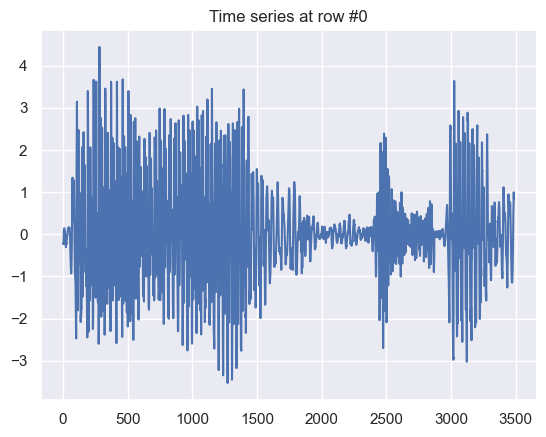

In [12]:
index = 0
plt.plot(new_traces[index])
plt.title(f'Time series at row #{index}')
plt.show()

In [13]:
from IPython.display import Audio

new_traces = np.nan_to_num(new_traces)

Audio(new_traces[0], rate=SAMPLING_RATE)

# Fourier stuff

In [14]:
def bin_spectral_energy(spectrum_energy, n_bins, max_freq, sampling_rate=SAMPLING_RATE, plot_check=False):
    T = 1.0/sampling_rate

    # Removes higher-pitch part that makes bins unequal
    ss = spectrum_energy[:len(spectrum_energy) - (len(spectrum_energy)%n_bins) ]
    ffs = fftfreq(2*len(ss), T)[:len(ss)]

    ff_bin_edges = np.linspace(0, max_freq, n_bins + 1, endpoint=True)

    binned_energies = np.zeros(n_bins)
    for i in range(n_bins):
        binned_energies[i] = np.mean(ss[(ffs >= ff_bin_edges[i])&(ffs < ff_bin_edges[i+1])] )

    if plot_check:
        plt.plot(ffs, ss, ls="", marker=".", ms=3)
        plt.step(ff_bin_edges[:-1],binned_energies, where="post",alpha=0.7)
        plt.yscale("log")
    return binned_energies

In [15]:
from scipy.fft import fft, fftfreq
from tqdm import tqdm

traces_dict["syllables_0_2_sc"] = []
traces_dict["syllables_0_2_stft"] = []

N_SPECTRAL_BINS = 60
N_TIME_BINS = 30

max_frequencies_taken = np.zeros(len(df))
max_frequencies = max_frequencies_taken.copy()
len_of_windows = max_frequencies.copy()

for tr_indx, tr in tqdm(enumerate(new_traces), total=len(df)):

    # Removes padding
    signal = tr[~np.isnan(tr)]

    # Gets values of stuff
    N, T = len(signal), 1.0/SAMPLING_RATE

    windows = np.array_split(signal, N_TIME_BINS)
    winlen = np.min([len(w) for w in windows])

    #     print("signal", len(signal))
    #     print("winlen", winlen)
    #     print("n of freqs", winlen//2)

    STFT = np.zeros((N_TIME_BINS, N_SPECTRAL_BINS))
    STFT_CENTROID = np.zeros(N_TIME_BINS)
    FF = fftfreq(winlen, T)[:winlen//2]

    for i, part in enumerate(windows):
        regularized_window = np.hamming(len(part))*part
        window_spectrum = np.abs(fft(regularized_window)[:winlen//2])**2

        # Saves the binned STFT
        STFT[i, :] = np.log(bin_spectral_energy(window_spectrum, N_SPECTRAL_BINS, 3000))

        # Gets distribution
        energy_density = window_spectrum /np.sum(window_spectrum)

        # Gets weighted mean
        STFT_CENTROID[i] = np.sum(energy_density*FF)


    traces_dict["syllables_0_2_sc"].append(STFT_CENTROID)
    traces_dict["syllables_0_2_stft"].append(STFT)

    # Saves max freqs taken
    max_frequencies[tr_indx] = (FF[-1])
    max_frequencies_taken[tr_indx] = (FF[N_SPECTRAL_BINS])
    len_of_windows[tr_indx] = winlen

# Makes them array
traces_dict["syllables_0_2_sc"] = np.array(traces_dict["syllables_0_2_sc"])
traces_dict["syllables_0_2_stft"] = np.array(traces_dict["syllables_0_2_stft"])

  0%|          | 0/2452 [00:00<?, ?it/s]/var/folders/ll/kv_3vwz11y3b1l9g2f0x8n_80000gn/T/ipykernel_2975/3358813638.py:38: RuntimeWarning: divide by zero encountered in log
  STFT[i, :] = np.log(bin_spectral_energy(window_spectrum, N_SPECTRAL_BINS, 3000))
/var/folders/ll/kv_3vwz11y3b1l9g2f0x8n_80000gn/T/ipykernel_2975/3358813638.py:41: RuntimeWarning: invalid value encountered in divide
  energy_density = window_spectrum /np.sum(window_spectrum)
100%|██████████| 2452/2452 [00:21<00:00, 111.53it/s]


In [16]:
for t in ["syllables_0_2_sc", "syllables_0_2_stft"]:
    np.save(os.path.join(TS_PREPROC_FOLDER, f"{t}.npy"), traces_dict[t])